# Задание 1
считаем суммарные баллы
18
24
20
19

По методу, предложенному на курсе, мы выбираем гипотезу "Улучшить мобильную версию сайта, чтобы клиенты могли легко переходить на сайт через email-рассылки с мобильных устройств.", используя в качестве метрики сумму оценок (через средневзвешенное она тоже побеждает).

Однако от себя хочу добавить, что как видно из таблицы, это гипотеза самая сложная в реализации, поэтому я бы подошёл к подбору по-другому.

Во-первых, убираю гипотезу "Использовать более яркие и привлекательные заголовки в email-рассылках, чтобы привлечь внимание клиентов и заставить их нажать на ссылку", поскольку она самая простая, но и по важности самая бесполезная для бизнеса.

Про вторую гипотезу мы уже знаем, что она самая сложная, причём относительно других значительно, поэтому её тоже бы убрал из рассмотрения.

Я бы предпочёл выбрать гипотезу "персонализированные email-рассылки, учитывая интересы и предпочтения каждого клиента, чтобы они чувствовали себя более привлеченными к переходу на сайт.", поскольку по сравнению с другой оставшейся она проще, потенциальных эффект выше, по остальным же метрикам паритет. Минус моего подхода: избегание долгих и трудных задач, но с большим выхлопом, отбор средних по сложности со средним выхлопом. Но тут вопрос к бизнесу: либо мы верим в что-то одно грандиозное и работаем только над этим, либо же стабильно пилим много средних проектов без сюрпризов)

# Задание 2
Согласно методу отбора гипотез с курса, мы остановились на гипотезе 
"Улучшить мобильную версию сайта, чтобы клиенты могли легко переходить на сайт через email-рассылки с мобильных устройств."

Поскольку мы хотим оценить "легкость перехода", то нам необоходимо смотреть конверсию из email на сайт.
Причём я бы смотрел и тотально, и с разделением на desktop/mobile, поскольку мы можем поднять нашу целевую конверсию для мобилок, но случайно раскатать для пользователей ПК и уронить её. Из-за того, что мы нагнали трафика в мобилку, мы сначала можем не заметить наш баг в desktop при оценки конверсии тотал.

Далее, смежные метрики (можем повысить одну, уронить другую и вот это вот всё)
конверсия в добавление в корзину,
конверсия в покупку,
кол-во страниц до покупки,
time2buy,
средний чек,
Revenue/leads (выручка на одного лида в рассылке)

В общем, проверяю, что для людей сайт остался привлекательным и они на нём покупают, (средний чек, конверсии, выручка на лида), но при этом он остался удобным и в нём не блуждают (не кликают страницы в поисках корзины и т.д.)

# Задание 3

In [182]:
import pandas as pd

Читаю файлы, смотрю

In [183]:
opened = pd.read_csv('Data for MDE - opened.csv')
clicked = pd.read_csv('Data for MDE - clicked.csv')

In [184]:
opened.head(5)

,date,user_id
0,01.01.2023,101232
1,01.01.2023,101233
2,01.01.2023,101234
3,01.01.2023,101235
4,01.01.2023,101236


In [185]:
clicked.head(5)

,date,user_id
0,01.01.2023,101240
1,01.01.2023,101241
2,01.01.2023,101242
3,01.01.2023,101243
4,01.01.2023,101244


Чек на дубли (проверка на уникальность ключа дата - юзер)

In [186]:
opened.value_counts().reset_index().sort_values(by = 0, ascending=False)

,date,user_id,0
0,01.01.2023,101232,1
3242,01.01.2023,101251,1
3240,01.01.2023,101234,1
3239,01.01.2023,101235,1
3238,01.01.2023,101236,1
...,...,...,...
1617,31.01.2023,103768,1
1616,31.01.2023,103769,1
1615,31.01.2023,103770,1
1614,31.01.2023,103755,1


In [187]:
clicked.value_counts().reset_index().sort_values(by = 0, ascending=False)

,date,user_id,0
0,01.01.2023,101240,1
336,01.01.2023,101242,1
334,01.01.2023,101244,1
333,01.01.2023,101245,1
332,01.01.2023,101246,1
...,...,...,...
159,31.01.2023,103733,1
158,31.01.2023,103734,1
157,31.01.2023,103735,1
156,31.01.2023,103736,1


Присоединяю единичики к открытиям и кликам для последующего подсчёта конверсии
Да, можно было проще через просто создание нового столбца из единиц, но почему-то при написании кода я сделал так

In [188]:
opened1 = pd.merge(opened, opened.value_counts().reset_index().sort_values(by = 0, ascending=False), on = ['date', 'user_id'], how = 'left')
clicked1 = pd.merge(clicked, opened.value_counts().reset_index().sort_values(by = 0, ascending=False), on = ['date', 'user_id'], how = 'left') 

Получаю табличку, удобную для расчёта конверсий

In [189]:
for_conv = pd.merge(opened1, clicked1, on = ['date', 'user_id'], how = 'outer')
for_conv['0_y'] = for_conv['0_y'].fillna(0)
for_conv.head(5)

,date,user_id,0_x,0_y
0,01.01.2023,101232,1,0.0
1,01.01.2023,101233,1,0.0
2,01.01.2023,101234,1,0.0
3,01.01.2023,101235,1,0.0
4,01.01.2023,101236,1,0.0


Аггрегирую до дня и считаю дневную конверсию

In [190]:
opened2 = for_conv.groupby(['date'], as_index = False)['0_x'].sum()
clicked2 = for_conv.groupby(['date'], as_index = False)['0_y'].sum() 
conv = pd.merge(opened2, clicked2, on = 'date', how='left') #джоиним клики и лиды
conv['CR'] = conv['0_y']/conv['0_x'] #считаем конверсию
conv['date'] = pd.to_datetime(conv['date'], format = '%d.%m.%Y')
conv.sort_values(by = 'date', ascending=True).head(5)

,date,0_x,0_y,CR
0,2023-01-01,84,8.0,0.095238
2,2023-01-02,72,8.0,0.111111
4,2023-01-03,90,8.0,0.088889
6,2023-01-04,79,7.0,0.088608
8,2023-01-05,72,8.0,0.111111


In [191]:
import matplotlib.pyplot as plt

Визуализирую

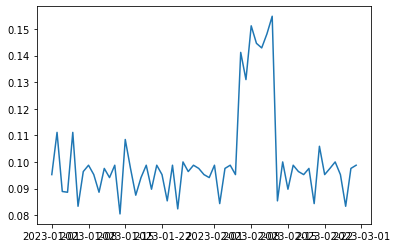

In [192]:
plot = conv.set_index('date')
plot.sort_index(inplace = True)
fig, ax = plt.subplots()
plt.plot(plot['CR'])
plt.show()

Чек на аномалию - есть клик, нет открытия

In [193]:
check = for_conv.loc[(for_conv['0_y'] == 1) & (for_conv['0_x'] == 0)].reset_index()
check

,index,date,user_id,0_x,0_y


In [194]:
mylist = ['2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-12', '2023-02-12']
plot[plot.index.isin(mylist)].describe()

,0_x,0_y,CR
count,6.000000,6.000000,6.000000
mean,84.333333,12.166667,0.144248
std,1.032796,0.752773,0.008326
min,83.000000,11.000000,0.130952
25%,84.000000,12.000000,0.141597
50%,84.000000,12.000000,0.143718
75%,84.750000,12.750000,0.149517
max,86.000000,13.000000,0.154762


In [195]:
plot[~plot.index.isin(mylist)].describe()

,0_x,0_y,CR
count,53.000000,53.000000,53.000000
mean,82.018868,7.867925,0.096050
std,2.964473,0.760509,0.009945
min,72.000000,7.000000,0.080460
25%,81.000000,8.000000,0.089744
50%,82.000000,8.000000,0.096386
75%,84.000000,8.000000,0.098765
max,90.000000,12.000000,0.148148


Медианная конверсия не в пиковые дни 9,6%
Медианная конверсия в пиковые дни 14,4%

В рамках эксперимента я бы ожидал прироста как минимум на 4.8 п.п.

# Задание 4

Воспользуюсь https://www.evanmiller.org/ab-testing/sample-size.html
Baseline conversion rate:	9,6
Minimum Detectable Effect: 4.8

Sample size:
627
per variation

Две группы => 627*2 = 1254

Ожидаем 240 писем в день (из текста задания) => 1254/240 = 5,225 дня. Я бы заложил все 7 дней при запуске в понедельник)
Кол-во писем может случайно не набраться => остановим, а значимость не можем проверить...

# Задание 5

In [196]:
four = pd.read_csv('Data for monitoring - first 4 days.csv')
four['date'] = pd.to_datetime(four['date'], format = '%d.%m.%Y')
four.head(5)

,date,group,user_id,converted
0,2023-03-01,control,106085,1
1,2023-03-01,control,106086,1
2,2023-03-01,control,106087,1
3,2023-03-01,control,106088,1
4,2023-03-01,control,106089,1


Проверить:
 1. один user_id и в control, и в treatment 
 2. кол-во user_id по дням в control и treatment 
 3. конверсии по дням в control и treatment

In [197]:
four['user_id'].value_counts().reset_index().sort_values(by = 'user_id', ascending=False).head(5)
#1. один юзер - одна запись, ок

,index,user_id
0,106085,1
604,106205,1
636,106114,1
637,106099,1
638,106087,1


In [198]:
daily = four.groupby(['date', 'group'], as_index = False)['user_id'].count()
daily.head(5)

,date,group,user_id
0,2023-03-01,control,119
1,2023-03-01,treatment,122
2,2023-03-02,control,127
3,2023-03-02,treatment,119
4,2023-03-03,control,126


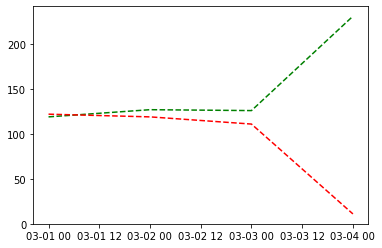

In [199]:
daily1 = daily.loc[(daily['group']=='control')].reset_index()
daily2 = daily.loc[(daily['group']=='treatment')].reset_index()

fig, ax = plt.subplots()

plt.plot(daily1['date'], daily1['user_id'], '--', color = 'green')
plt.plot(daily2['date'], daily2['user_id'], '--', color = 'red')
plt.show()

In [200]:
daily
#2. проблема, 2023-03-04 поломалась разметка, почтивсе ушли в контрольную группу

,date,group,user_id
0,2023-03-01,control,119
1,2023-03-01,treatment,122
2,2023-03-02,control,127
3,2023-03-02,treatment,119
4,2023-03-03,control,126
5,2023-03-03,treatment,111
6,2023-03-04,control,231
7,2023-03-04,treatment,11


In [201]:
conveted = four.loc[(four['converted'] == 1)].groupby(['date', 'group'], as_index = False)['user_id'].count()
conveted.head(5)
#3. чуть отошёл от изначальной гипотезы и чекнул кол-во совершиваших целевое действие, всё ок

,date,group,user_id
0,2023-03-01,control,12
1,2023-03-01,treatment,14
2,2023-03-02,control,12
3,2023-03-02,treatment,15
4,2023-03-03,control,12


In [202]:
four.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       966 non-null    datetime64[ns]
 1   group      966 non-null    object        
 2   user_id    966 non-null    int64         
 3   converted  966 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 30.3+ KB


In [203]:
four.describe()

,user_id,converted
count,966.00000,966.000000
mean,106567.50000,0.090062
std,279.00448,0.286419
min,106085.00000,0.000000
25%,106326.25000,0.000000
50%,106567.50000,0.000000
75%,106808.75000,0.000000
max,107050.00000,1.000000


In [204]:
four.converted.value_counts()
#проверил, что только 0 и 1

0    879
1     87
Name: converted, dtype: int64

# Задание 6

In [205]:
data = pd.read_csv('Data for results.csv')
data['date'] = pd.to_datetime(data['date'], format = '%d.%m.%Y')
data.head(5)

,date,group,user_id,converted
0,2023-03-01,control,106085,1
1,2023-03-01,control,106086,1
2,2023-03-01,control,106087,1
3,2023-03-01,control,106088,1
4,2023-03-01,control,106089,1


In [206]:
data.groupby('group').agg({'user_id': ['count'], 'converted': ['sum']}).reset_index() 
#увы, тест не значимый (посмотрел в калькуляторе аб тестов)

,group,user_id,converted
,,count,sum
0,control,613,61
1,treatment,592,75


In [207]:
#что по дням, ничего особенного, просто реально эксперимент оказался так себе
plot = data.groupby(['date', 'group']).agg({'user_id': ['count'], 'converted': ['sum']}).reset_index() 
plot

,date,group,user_id,converted
,,,count,sum
0,2023-03-01,control,119,12
1,2023-03-01,treatment,122,15
2,2023-03-02,control,127,13
3,2023-03-02,treatment,119,15
4,2023-03-03,control,126,12
5,2023-03-03,treatment,111,15
6,2023-03-04,control,121,12
7,2023-03-04,treatment,120,15
8,2023-03-05,control,120,12
